In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mno

In [65]:
df = pd.read_csv("C:/Users/lee/Desktop/핀테크/4. 금융분석모델링/프로젝트/cs-training.csv")
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 10 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           150000 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfDependents                      150000 non-null float64
dtypes: float64(4), int64(6)
memory usage: 11.4 MB


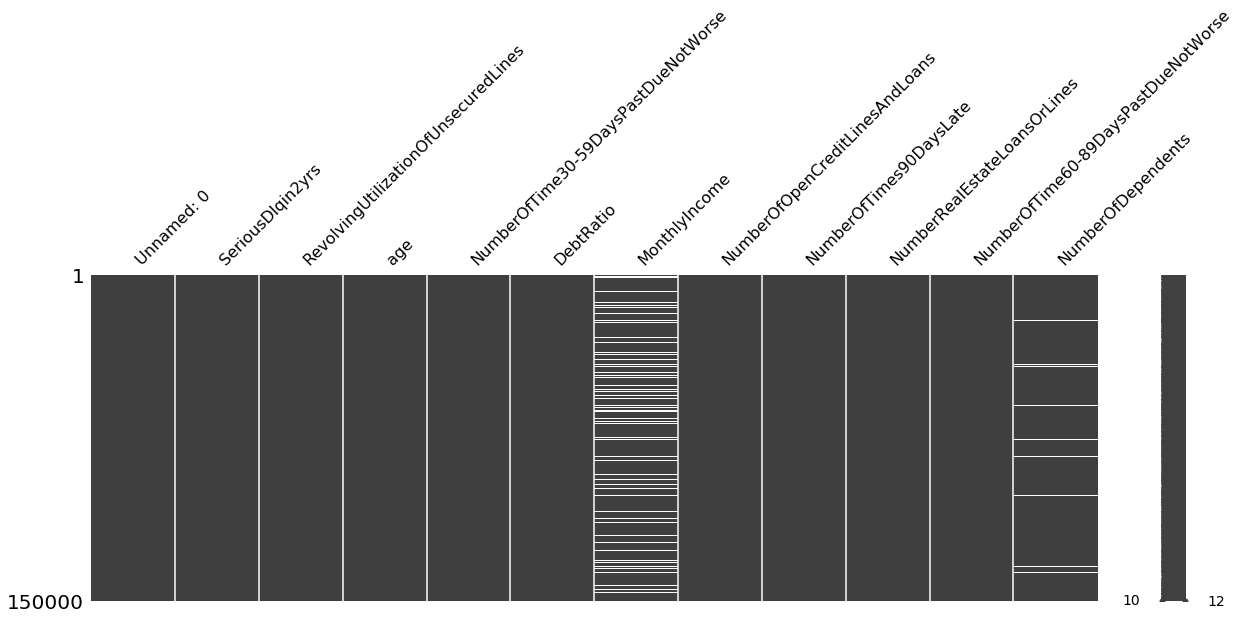

In [66]:
mno.matrix(df, figsize = (20, 6))

In [67]:
df['NumberOfDependents'].fillna(train_df['NumberOfDependents'].median(), inplace=True)
df['MonthlyIncome'].fillna(train_df['MonthlyIncome'].median(), inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           150000 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      150000 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [69]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [71]:
df = df.drop(['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse'], axis=1)

In [72]:
df.NumberRealEstateLoansOrLines[30587] = 32
df.NumberRealEstateLoansOrLines[30587]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


32

In [73]:
for i in df[df['RevolvingUtilizationOfUnsecuredLines'] > 10000].index:
    df['RevolvingUtilizationOfUnsecuredLines'][i] = 9684

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
train_df.shape

(150000, 10)

In [74]:
X=np.array(df.drop(columns='SeriousDlqin2yrs'))
Y=np.array(df.SeriousDlqin2yrs)
print(Y)

[1 0 0 ... 0 0 0]


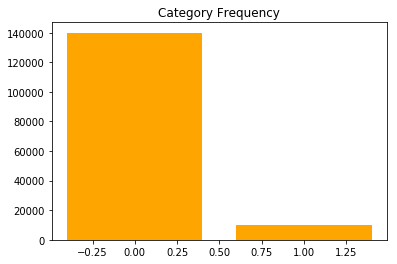

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [75]:
labels=['0','1']
table = df.SeriousDlqin2yrs.value_counts()
plt.bar(table.index,table.values,color = 'orange')
plt.title('Category Frequency')
plt.show()
table

In [76]:
my_cols_dict = {'1':'red', '0':'green'}
my_cols = df['SeriousDlqin2yrs'].apply(lambda x: my_cols_dict[x])
pd.plotting.scatter_matrix(train_df, c=my_cols, marker='o', alpha=0.5)#알파값은 투명도-오버랩되면 알수 없기떄문
plt.show();

KeyError: 1

In [78]:
mask = df['SeriousDlqin2yrs'].notnull()#notnull()는 관측치가 결측이면 False, 결측이 아니면 True를 반환

In [87]:
bins1 = [0, 0.25, 0.50, 0.75, 1.0, 1.25, df['RevolvingUtilizationOfUnsecuredLines'].max()] #신용도로 그룹화
labels1 = ['0-0.25', '0.25-0.50', '0.50-0.75', '0.75-1.0', '1.0-1.25','1.25+']

df['ru_grouped'] = pd.cut(train_df['RevolvingUtilizationOfUnsecuredLines'],bins1, right=0, labels=labels1)
gb1 = df[mask].groupby('ru_grouped')['SeriousDlqin2yrs']
pd.concat([gb1.count(), gb1.mean()], axis=1) #빈도, 평균

,SeriousDlqin2yrs,SeriousDlqin2yrs
ru_grouped,,
0-0.25,87657,0.021367
0.25-0.50,21055,0.052909
0.50-0.75,13764,0.101279
0.75-1.0,24186,0.182089
1.0-1.25,2412,0.384743
1.25+,909,0.344334


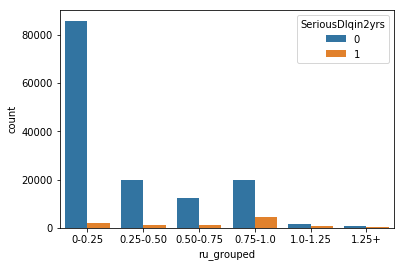

In [88]:
sns.countplot(data=df, x='ru_grouped', hue='SeriousDlqin2yrs')

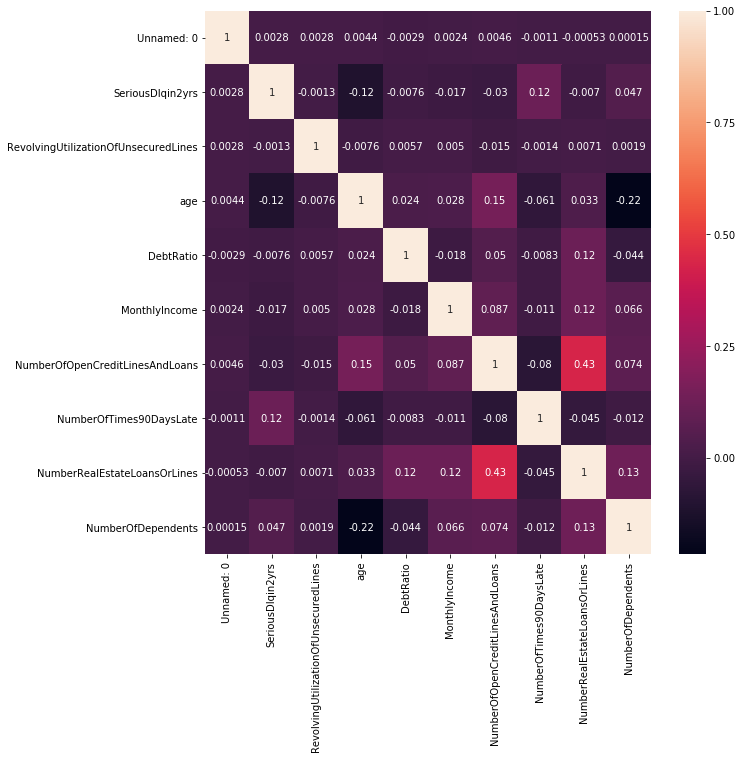

In [90]:
cor=df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True,ax=ax)

In [91]:
bins = [0, 30, 40, 50, 60, 70, 110] #0대~10대 합체_나이별로 그룹화
labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['age_grouped'] = pd.cut(df['age'], bins, right=0, labels=labels)
gb = df[mask].groupby('age_grouped')['SeriousDlqin2yrs']
pd.concat([gb.count(), gb.mean()], axis=1)

,SeriousDlqin2yrs,SeriousDlqin2yrs
age_grouped,,
0-29,8821,0.117334
30-39,23183,0.100720
40-49,34377,0.083719
50-59,35301,0.064531
60-69,28905,0.036326
70+,19413,0.023180


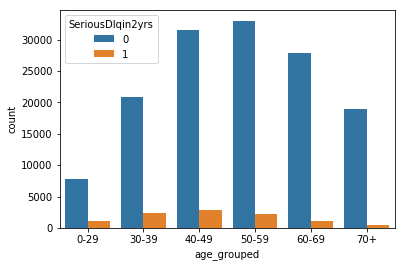

In [92]:
sns.countplot(data=df, x='age_grouped', hue='SeriousDlqin2yrs')

In [111]:
plt.boxplot([df[RevolvingUtilizationOfUnsecuredLines]
                                            ,age
                                            ,DebtRatio
                                            ,MonthlyIncome
                                           ,NumberOfOpenCreditLinesAndLoans
                                           ,NumberOfTimes90DaysLate
                                           ,NumberRealEstateLoansOrLines
                                           ,NumberOfDependents],0,
            labels = ['RevolvingUtilizationOfUnsecuredLines'
                                            ,'age'
                                            ,'DebtRatio'
                                            ,'MonthlyIncome'
                                           ,'NumberOfOpenCreditLinesAndLoans'
                                           ,'NumberOfTimes90DaysLate'
                                           ,'NumberRealEstateLoansOrLines'
                                           ,'NumberOfDependents'])

NameError: name 'RevolvingUtilizationOfUnsecuredLines' is not defined

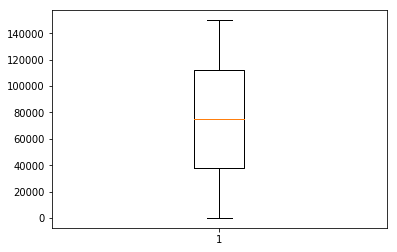

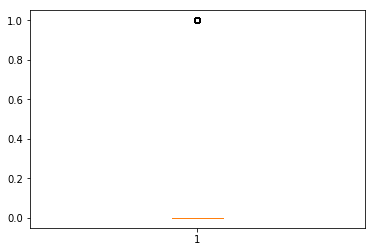

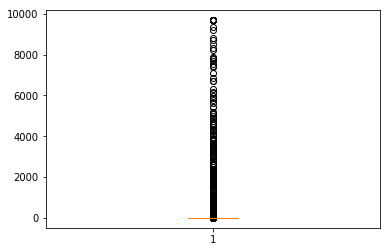

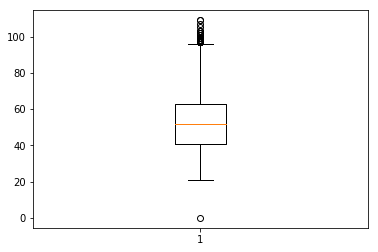

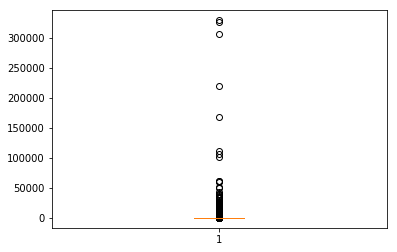

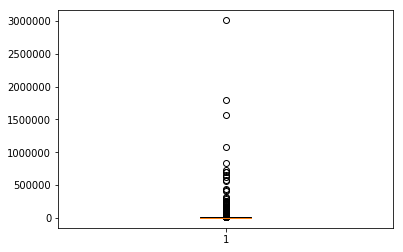

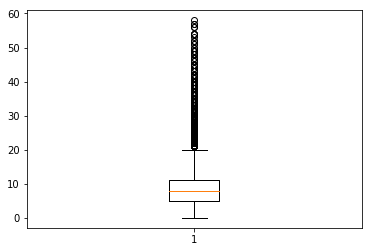

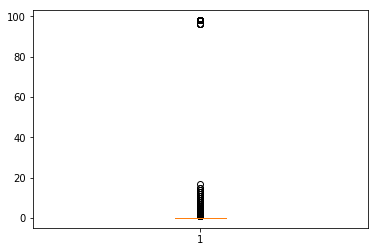

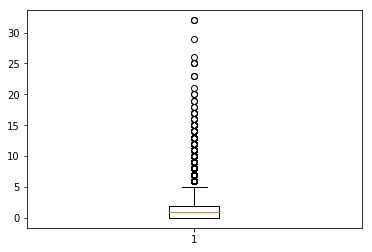

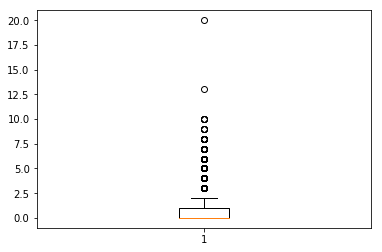

TypeError: cannot perform reduce with flexible type

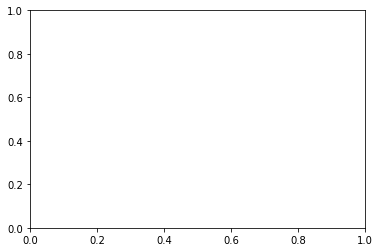

In [113]:
feature_list=list(df.columns.values)
for each in feature_list:
    plt.boxplot(df[each])
    plt.show()

### DeptRatio

In [117]:
bins2 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100,
       df['DebtRatio'].max()] #월별 부채지급
labels2 = ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9'
           , '0.9-1.0', '1.0-2.0', '2.0-5.0','5.0-10.0','10.0-20.0','20.0-50.0','50.0-100.0','100+']
df['dr_grouped'] = pd.cut(df['DebtRatio'], bins2, right=0,labels=labels2)
gb2 = df[mask].groupby('dr_grouped')['SeriousDlqin2yrs']
pd.concat([gb2.count(), gb2.mean()], axis=1)

,SeriousDlqin2yrs,SeriousDlqin2yrs
dr_grouped,,
0-0.1,24520,0.059299
0.1-0.2,17767,0.063601
0.2-0.3,20273,0.053766
0.3-0.4,18008,0.059251
0.4-0.5,13134,0.069590
0.5-0.6,8393,0.088407
0.6-0.7,5426,0.095651
0.7-0.8,3398,0.110065
0.8-0.9,2199,0.111869


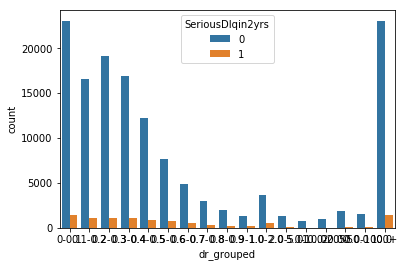

In [116]:
sns.countplot(data=df, x='dr_grouped', hue='SeriousDlqin2yrs')

In [118]:
bins3 = [0,1,2,df['NumberOfDependents'].max()] #월별 부채지급
labels3 = ['0-1', '1-2', '2+']
df['nd_grouped'] = pd.cut(df['NumberOfDependents'], bins3, right=0,labels=labels3)
gb3 = df[mask].groupby('nd_grouped')['SeriousDlqin2yrs']
pd.concat([gb3.count(), gb3.mean()], axis=1)

,SeriousDlqin2yrs,SeriousDlqin2yrs
nd_grouped,,
0-1,90826,0.058067
1-2,26316,0.073529
2+,32857,0.085735


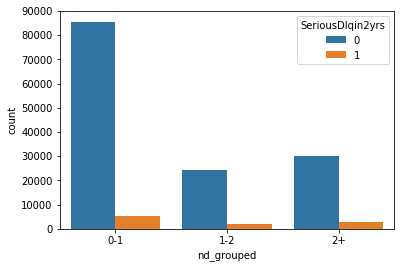

In [119]:
sns.countplot(data=df, x='nd_grouped', hue='SeriousDlqin2yrs')

### 오픈대출 수 

In [138]:
bins4 = [0, 10, 20, 30, 40, 50, 60] 
labels4 = ['0-9', '10-19', '20-29', '30-39', '40-49', '50+'] # label이 bins보다 1개 적어야함 
df['NumberOfOpenCreditLinesAndLoans_cut'] = pd.cut(df['NumberOfOpenCreditLinesAndLoans'], bins4, right=0, labels=labels4)
gb4 = df[mask].groupby('NumberOfOpenCreditLinesAndLoans_cut')['SeriousDlqin2yrs']
pd.concat([gb4.count(), gb4.mean()], axis=1)

,SeriousDlqin2yrs,SeriousDlqin2yrs
NumberOfOpenCreditLinesAndLoans_cut,,
0-9,97366,0.068741
10-19,47485,0.062272
20-29,4707,0.072233
30-39,370,0.072973
40-49,55,0.127273
50+,17,0.117647


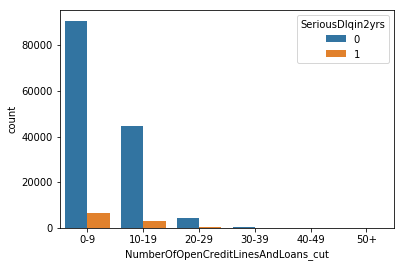

In [137]:
sns.countplot(data=df, x='NumberOfOpenCreditLinesAndLoans_cut', hue='SeriousDlqin2yrs')

### 90일 이상 연체

In [128]:
bins5 = [0, 20, 40, 60, 80, 100]
labels5 = ['0-19', '20-39', '40-59', '60-79', '80-99']
df['NT9_grouped'] = pd.cut(df['NumberOfTimes90DaysLate'], bins5, right=0, labels=labels5)
gb5 = df[mask].groupby('NT9_grouped')['SeriousDlqin2yrs']
pd.concat([gb5.count(), gb5.mean()], axis=1)

,SeriousDlqin2yrs,SeriousDlqin2yrs
NT9_grouped,,
0-19,149731,0.065978
20-39,0,NaN
40-59,0,NaN
60-79,0,NaN
80-99,269,0.546468


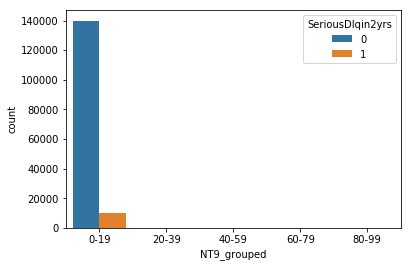

In [129]:
sns.countplot(data=df, x='NT9_grouped', hue='SeriousDlqin2yrs')

In [132]:
bins6 = [0, 10, 20, 30, 40]
labels6 = ['0-9', '10-19', '20-29', '29+']
df['NE_grouped'] = pd.cut(df['NumberRealEstateLoansOrLines'], bins6, right=0, labels=labels6)
gb6 = df[mask].groupby('NE_grouped')['SeriousDlqin2yrs']
pd.concat([gb6.count(), gb6.mean()], axis=1)

,SeriousDlqin2yrs,SeriousDlqin2yrs
NE_grouped,,
0-9,149869,0.066725
10-19,119,0.193277
20-29,10,0.300000
29+,2,0.000000


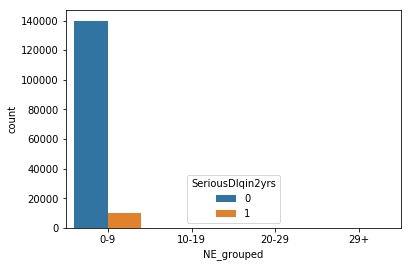

In [134]:
sns.countplot(data=df, x='NE_grouped', hue='SeriousDlqin2yrs')